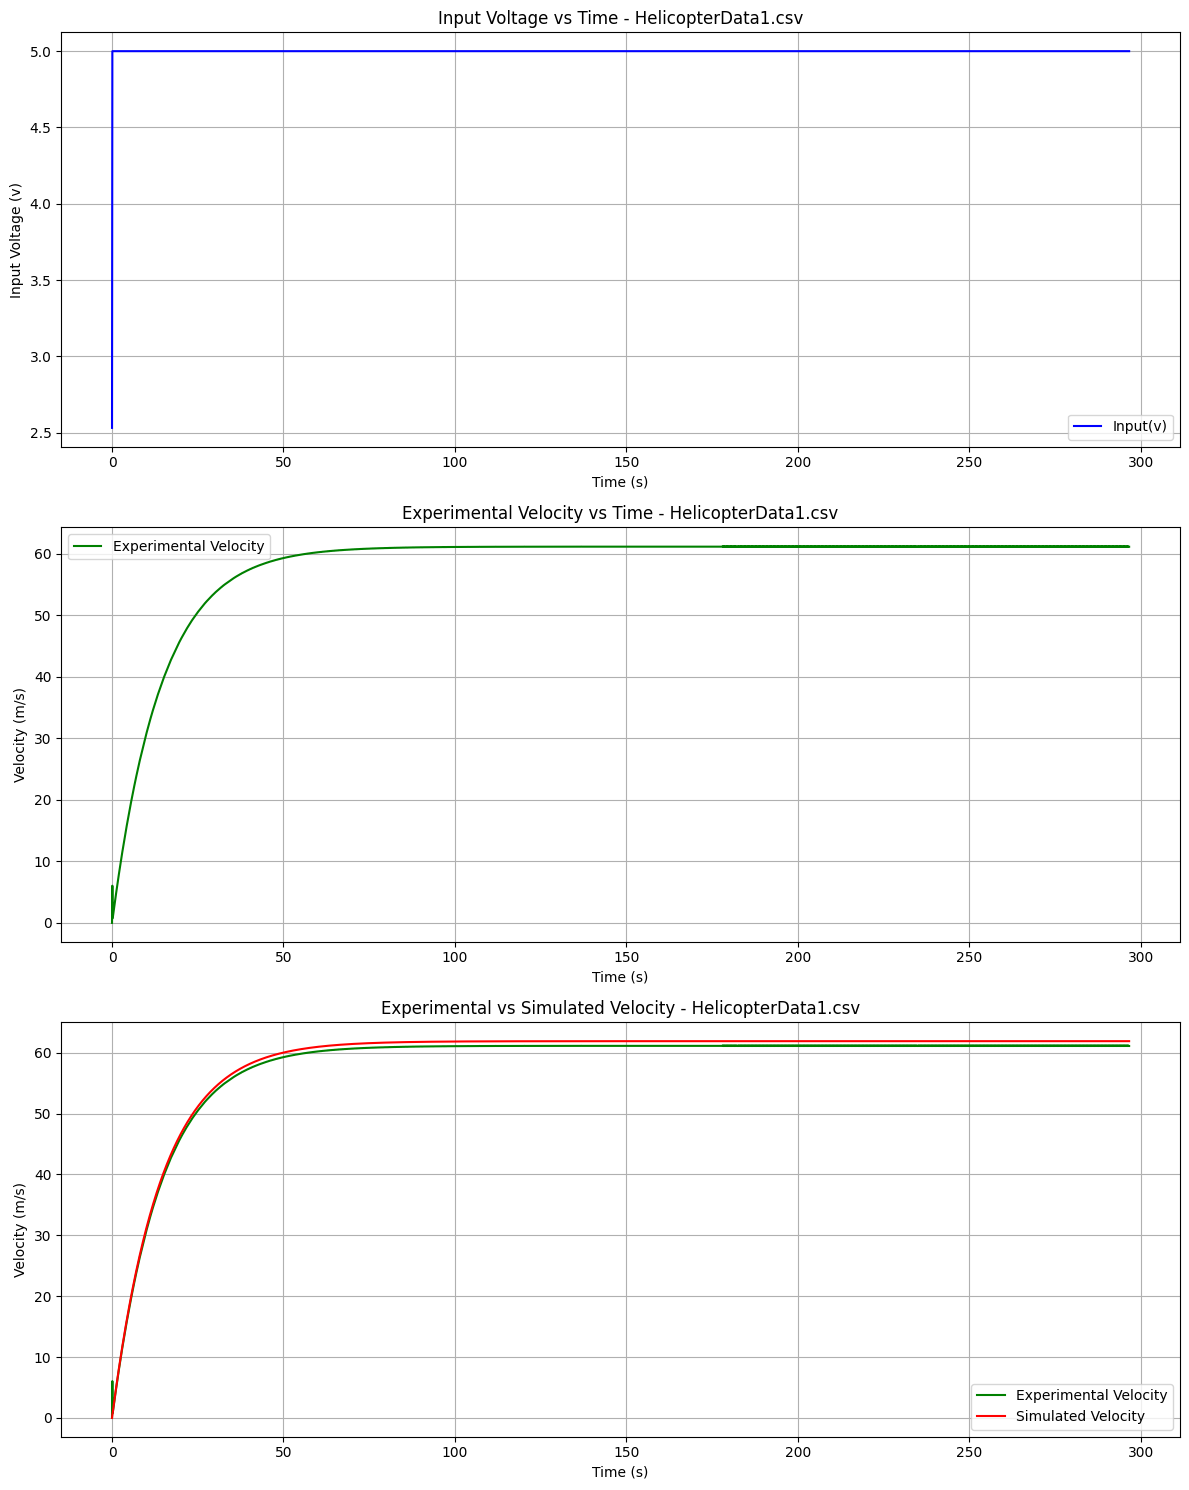

For file: HelicopterData1.csv
Gain (A): 24.756888168554266 m/s
Time Constant (tau): 14.3 s
Final Velocity: 61.09999999999193 m/s
The aerodynamic drag: 0.06993006993006992
Approximate Transfer Function for HelicopterData1.csv: G(s) = 24.756888168554266/14.3s + 1
---------------------------------------------------------------


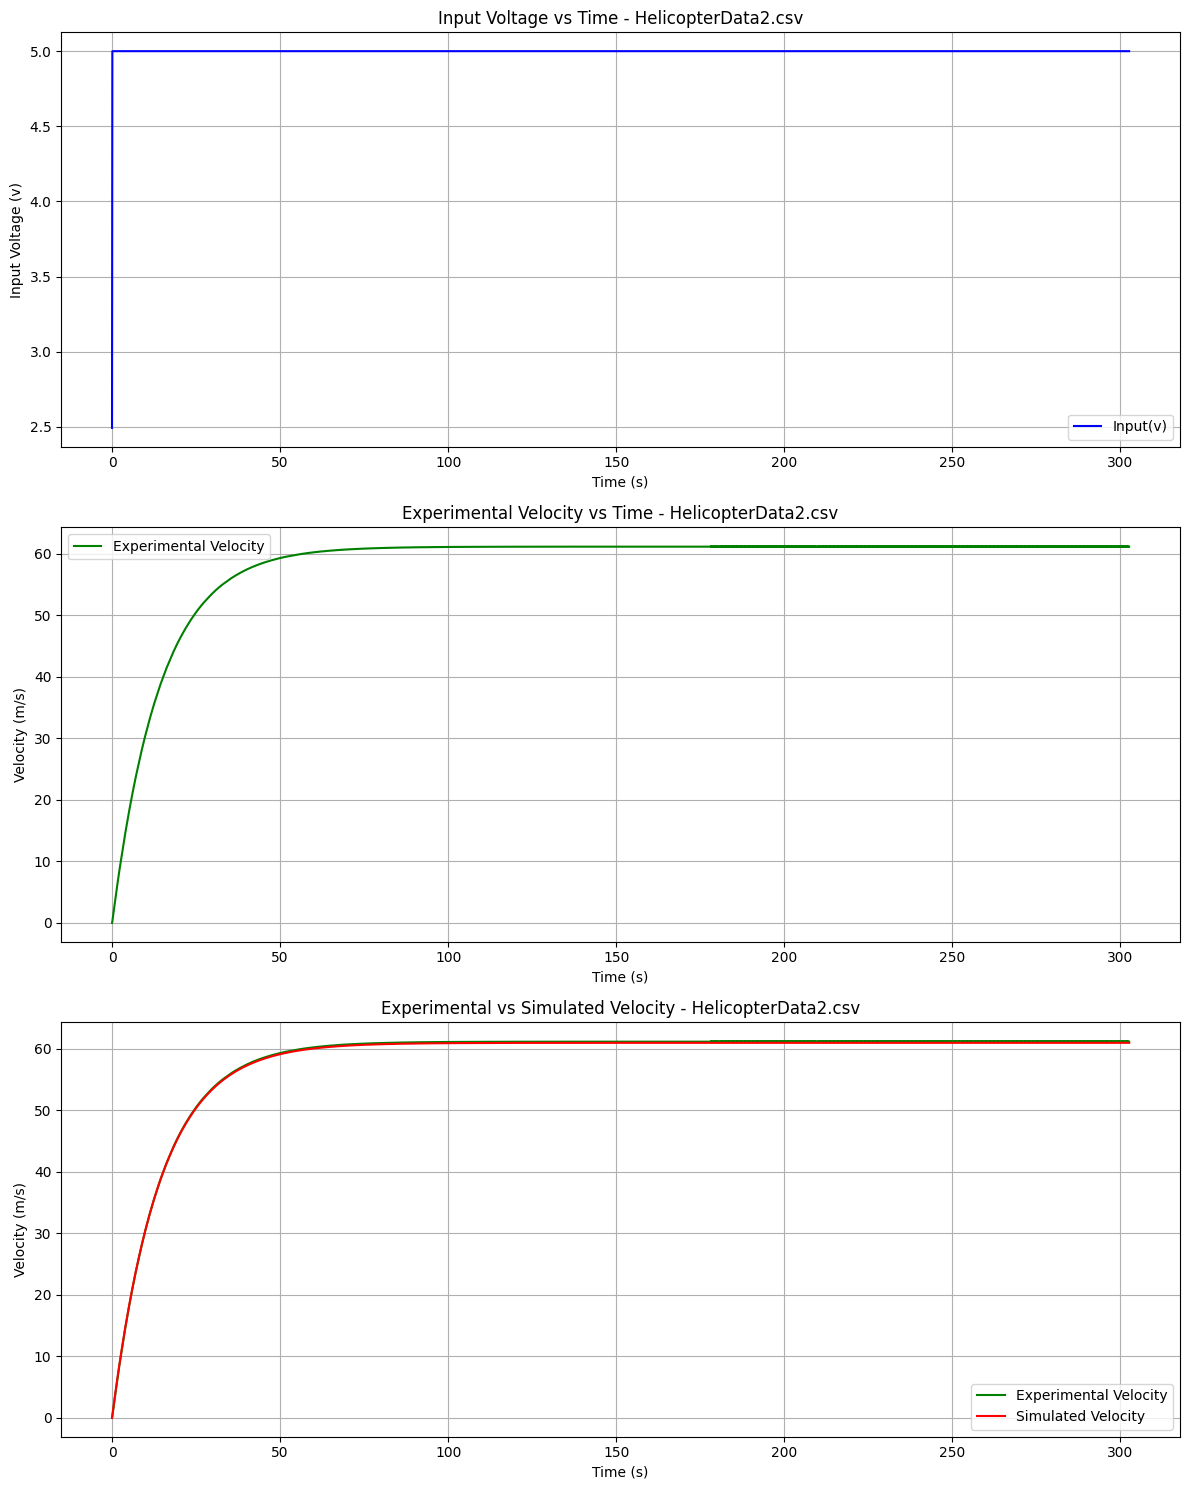

For file: HelicopterData2.csv
Gain (A): 24.371759074587924 m/s
Time Constant (tau): 14.3 s
Final Velocity: 61.09999999999193 m/s
The aerodynamic drag: 0.06993006993006992
Approximate Transfer Function for HelicopterData2.csv: G(s) = 24.371759074587924/14.3s + 1
---------------------------------------------------------------


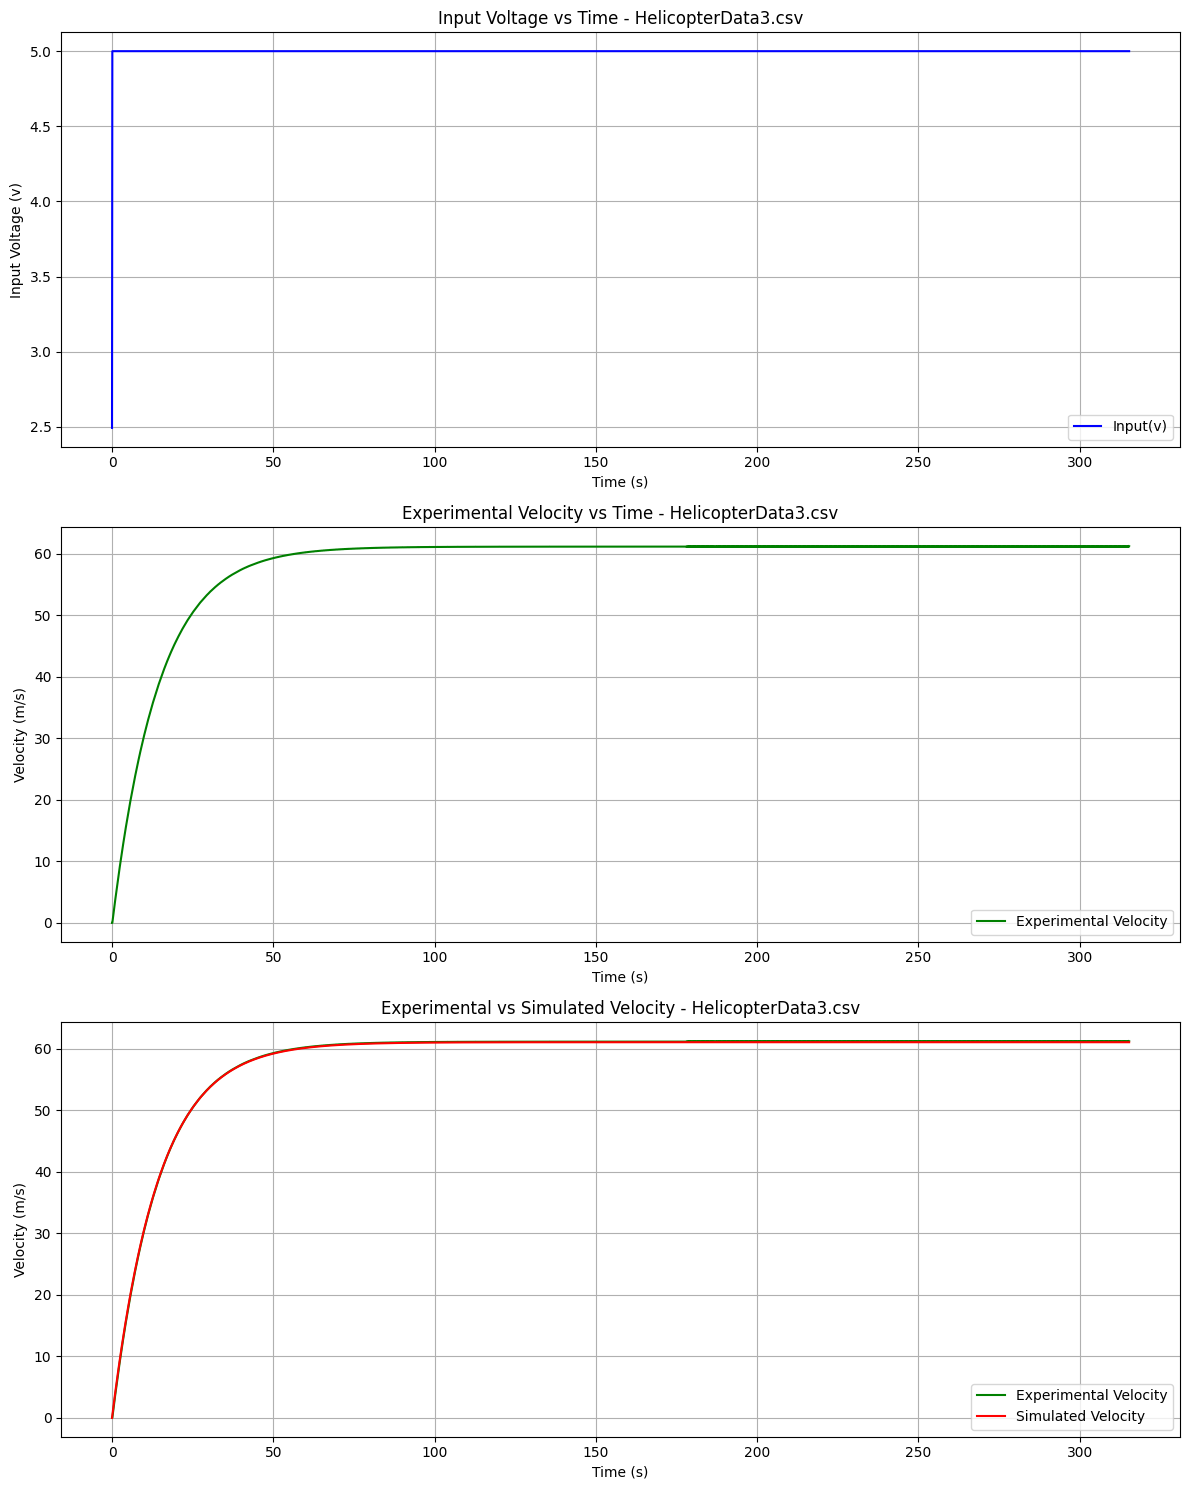

For file: HelicopterData3.csv
Gain (A): 24.4116473873059 m/s
Time Constant (tau): 14.3 s
Final Velocity: 61.1999999999759 m/s
The aerodynamic drag: 0.06993006993006992
Approximate Transfer Function for HelicopterData3.csv: G(s) = 24.4116473873059/14.3s + 1
---------------------------------------------------------------


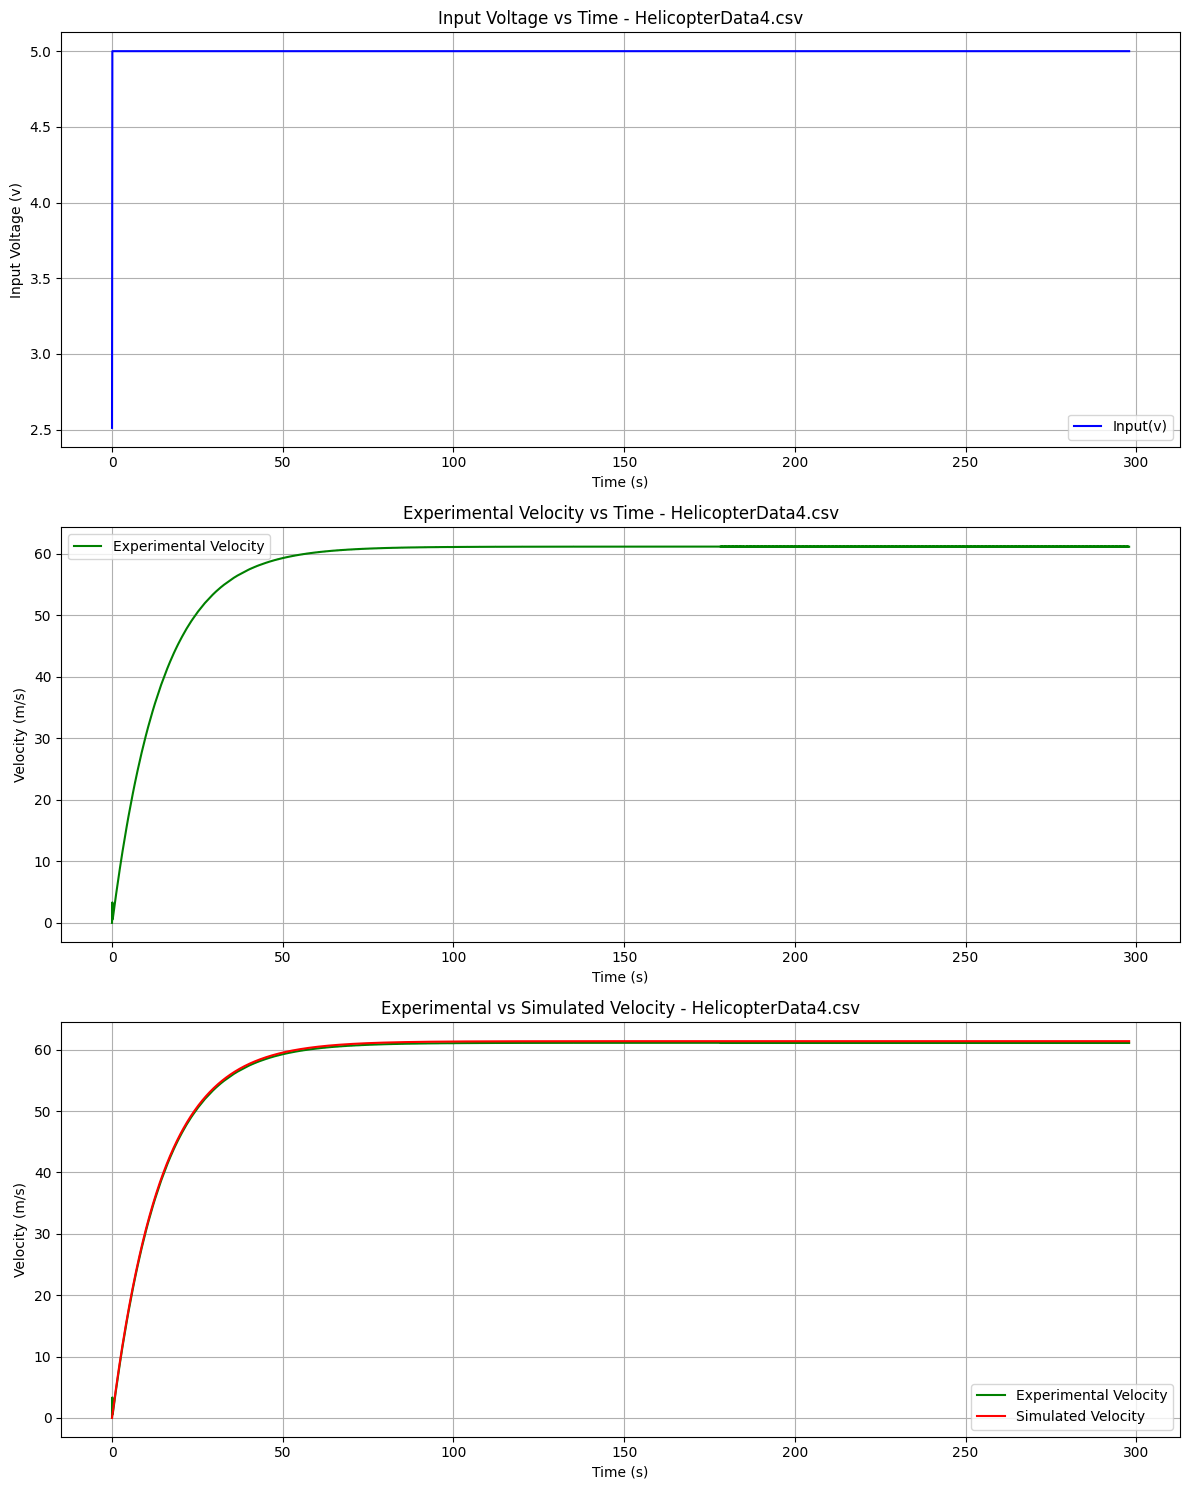

For file: HelicopterData4.csv
Gain (A): 24.55787781351554 m/s
Time Constant (tau): 14.3 s
Final Velocity: 61.10000000002666 m/s
The aerodynamic drag: 0.06993006993006992
Approximate Transfer Function for HelicopterData4.csv: G(s) = 24.55787781351554/14.3s + 1
---------------------------------------------------------------


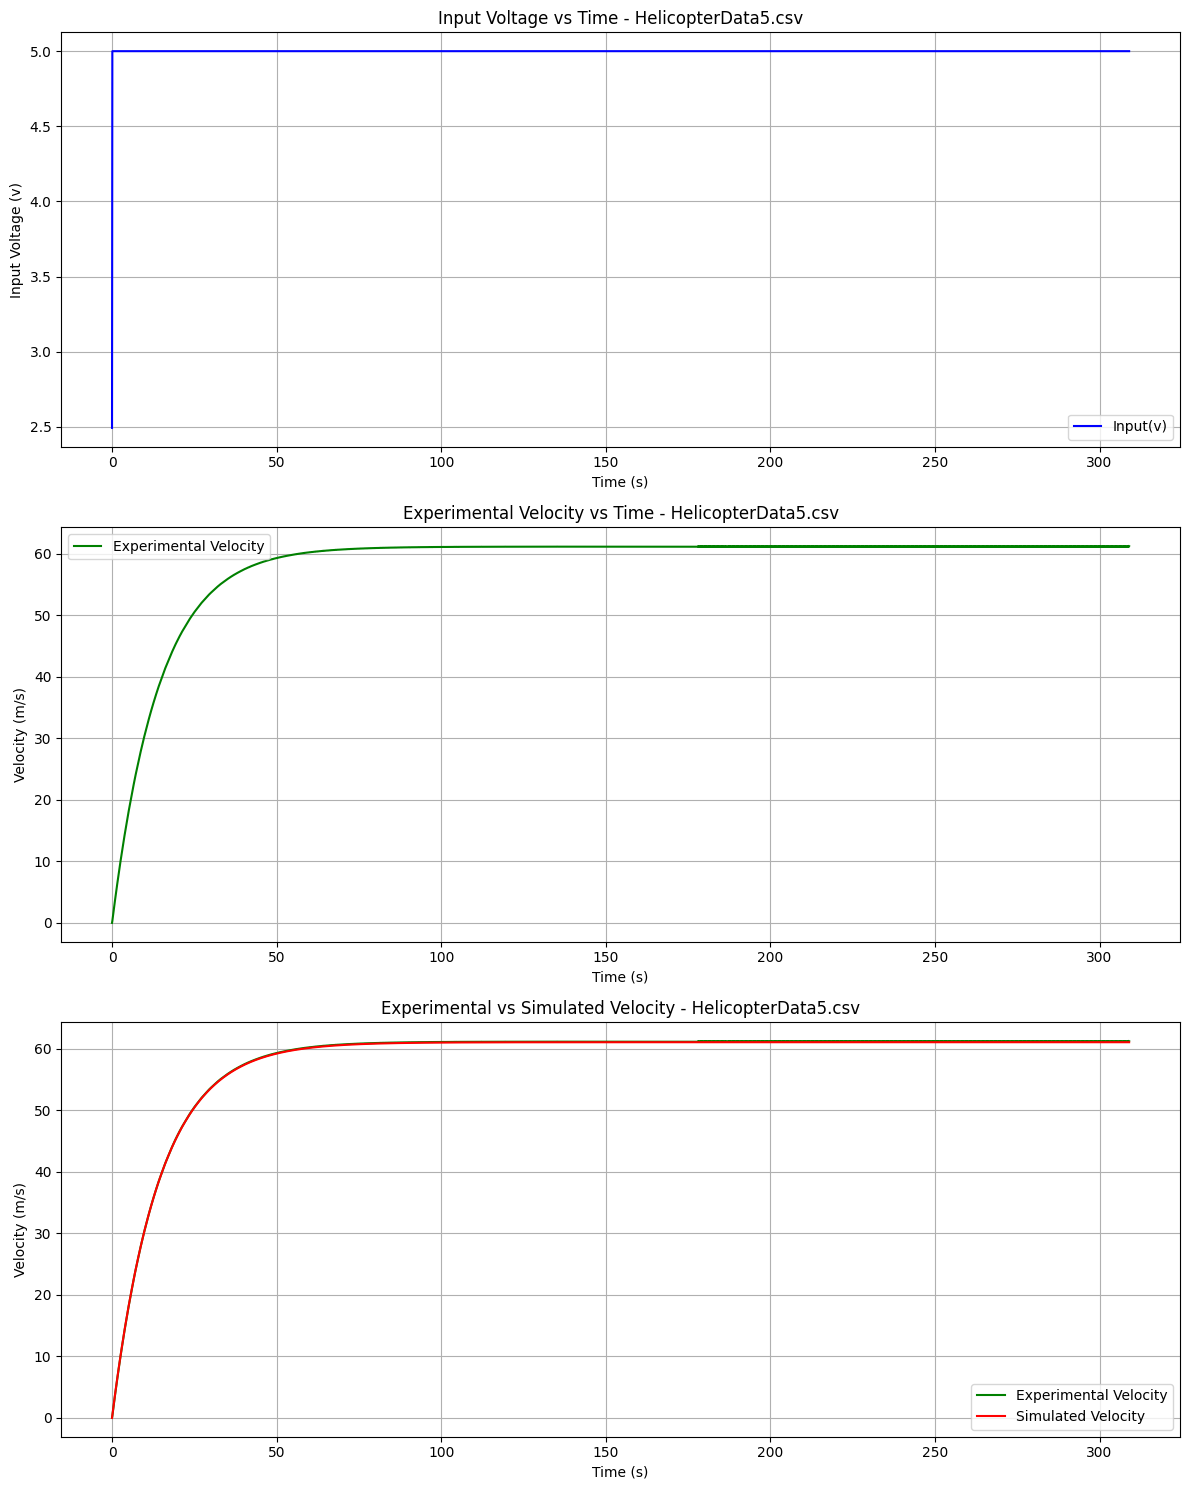

For file: HelicopterData5.csv
Gain (A): 24.4116473873059 m/s
Time Constant (tau): 14.3 s
Final Velocity: 61.1999999999759 m/s
The aerodynamic drag: 0.06993006993006992
Approximate Transfer Function for HelicopterData5.csv: G(s) = 24.4116473873059/14.3s + 1
---------------------------------------------------------------
Averages:
Average Gain (A): 24.501963966253903 m/s
Average Time Constant (tau): 14.3 s
Average Final Velocity: 61.13999999999246 m/s
Average Aerodynamic Drag: 0.06993006993006992
Approximate Transfer Function for all files: G(s) = 24.501963966253903/14.3s + 1
---------------------------------------------------------------


In [6]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import control as ctl

# Initialize variables
avg_gain = 0
avg_tau = 0
avg_final_velocity = 0
avg_drag = 0


# List all CSV files in the 'KITTICOPTER' folder
csv_files = [f for f in os.listdir('KITTICOPTER') if f.endswith('.csv')]

# Loop through all CSV files
for file_name in csv_files:
    file_path = os.path.join('KITTICOPTER', file_name)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Calculate velocity and add it as a new column
    delta_position = df['Output(m)'].diff()
    delta_time = df['Time(s)'].diff()
    df['Velocity'] = delta_position / delta_time
    df['Velocity'].fillna(0, inplace=True)
    
    # Calculate the final steady-state value of the velocity (Gain K)
    final_velocity = df['Velocity'].iloc[-1]
    
    # Calculate 63.2% of the final steady-state value
    final_value_63_percent = 0.632 * final_velocity
    
    # Find the time when the velocity reaches 63.2% of its final value
    time_63_percent = df[df['Velocity'] >= final_value_63_percent]['Time(s)'].iloc[0]
    
    # Calculate the time constant (tau), considering the initial time where velocity starts to change
    initial_time = df[df['Velocity'] > 0]['Time(s)'].iloc[0]
    tau = time_63_percent - initial_time
    
    # Calculate Gain
    stepMag = df['Input(v)'].iloc[-1] - df['Input(v)'].iloc[0]
    gain = final_velocity / stepMag
    
    # Create a transfer function
    numerator = [gain]
    denominator = [tau, 1]
    system = ctl.tf(numerator, denominator)
    
    # Time vector for simulation
    time = np.linspace(df['Time(s)'].iloc[0], df['Time(s)'].iloc[-1], len(df))
    
    # Simulate the step response
    time, simulated_output = ctl.forced_response(system, time, 2.5 * np.ones_like(time))

    # Create the plots
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    axs[0].plot(df['Time(s)'], df['Input(v)'], label='Input(v)', color='blue')
    axs[0].set_title(f'Input Voltage vs Time - {file_name}')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Input Voltage (v)')
    axs[0].grid(True)
    axs[0].legend()

    axs[1].plot(df['Time(s)'], df['Velocity'], label='Experimental Velocity', color='green')
    axs[1].set_title(f'Experimental Velocity vs Time - {file_name}')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Velocity (m/s)')
    axs[1].grid(True)
    axs[1].legend()

    axs[2].plot(df['Time(s)'], df['Velocity'], label='Experimental Velocity', color='green')
    axs[2].plot(time, simulated_output, label='Simulated Velocity', color='red')
    axs[2].set_title(f'Experimental vs Simulated Velocity - {file_name}')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Velocity (m/s)')
    axs[2].grid(True)
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    print(f"For file: {file_name}")
    print(f"Gain (A): {gain} m/s")
    print(f"Time Constant (tau): {tau} s")
    print(f"Final Velocity: {final_velocity} m/s")
    print(f"The aerodynamic drag: {1 / tau}")
    print(f"Approximate Transfer Function for {file_name}: G(s) = {gain}/{tau}s + 1")
    print("---------------------------------------------------------------")

    #Add up all tthe vlaues to get their averages
    avg_gain += gain
    avg_tau += tau
    avg_final_velocity += final_velocity
    avg_drag += 1 / tau     #Aerodynamic drag is 1/tau

#Calculate the averages
avg_gain /= len(csv_files)
avg_tau /= len(csv_files)
avg_final_velocity /= len(csv_files)
avg_drag /= len(csv_files)

#Print the averages
print("Averages:")
print(f"Average Gain (A): {avg_gain} m/s")
print(f"Average Time Constant (tau): {avg_tau} s")
print(f"Average Final Velocity: {avg_final_velocity} m/s")
print(f"Average Aerodynamic Drag: {avg_drag}")
print(f"Approximate Transfer Function for all files: G(s) = {avg_gain}/{avg_tau}s + 1")
print("---------------------------------------------------------------")


## Sensor Scalar coefficient

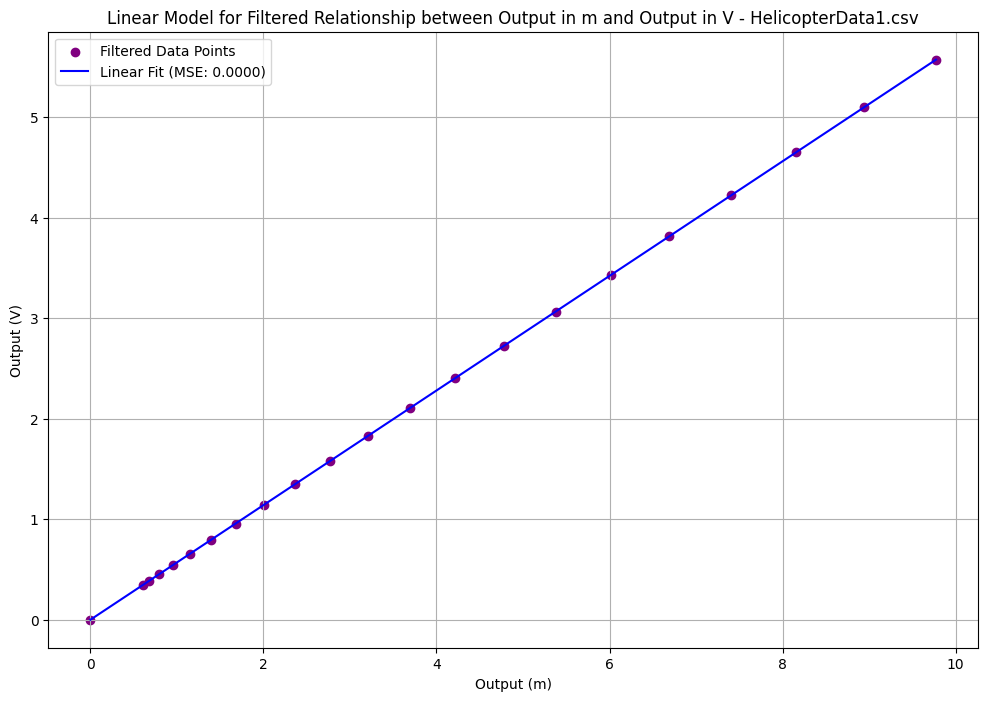

For file: HelicopterData1.csv
Pearson Correlation Coefficient: 0.9999999857149029
MSE for Linear Fit: 7.867630702480606e-08
Linear Equation for HelicopterData1.csv: y = 0.5699954462949367 * x + -3.7435942703556435e-05
---------------------------------------------------------------


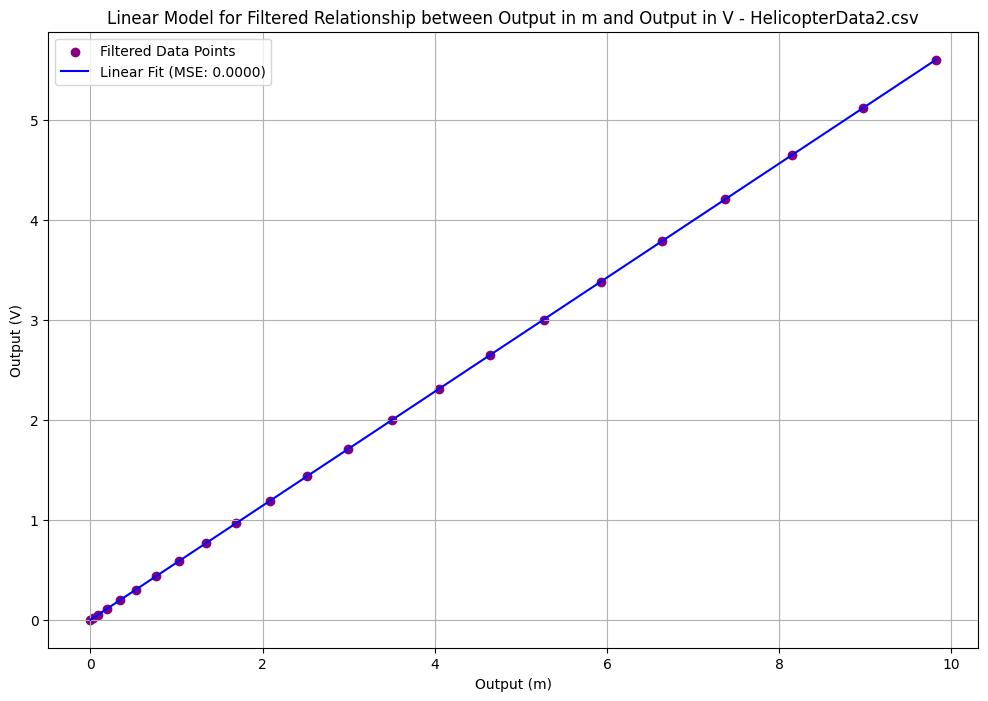

For file: HelicopterData2.csv
Pearson Correlation Coefficient: 0.999999977757185
MSE for Linear Fit: 1.3644790607358173e-07
Linear Equation for HelicopterData2.csv: y = 0.5699821447253482 * x + 6.223590622012054e-05
---------------------------------------------------------------


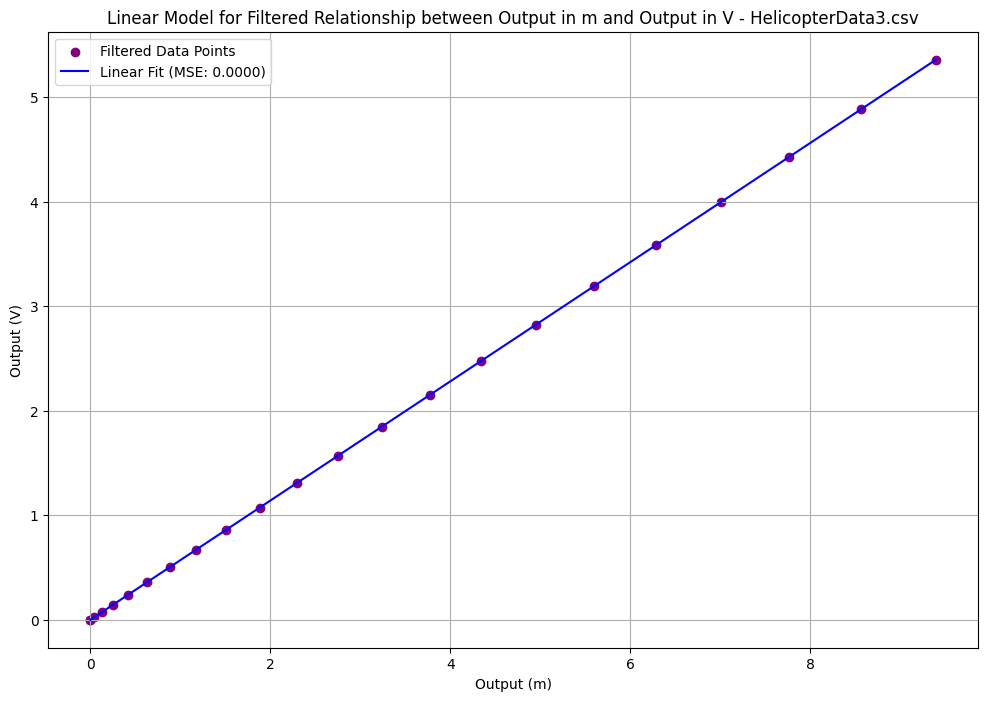

For file: HelicopterData3.csv
Pearson Correlation Coefficient: 0.9999999854186209
MSE for Linear Fit: 8.251934038334844e-08
Linear Equation for HelicopterData3.csv: y = 0.5699985513224997 * x + 5.893792925393271e-05
---------------------------------------------------------------


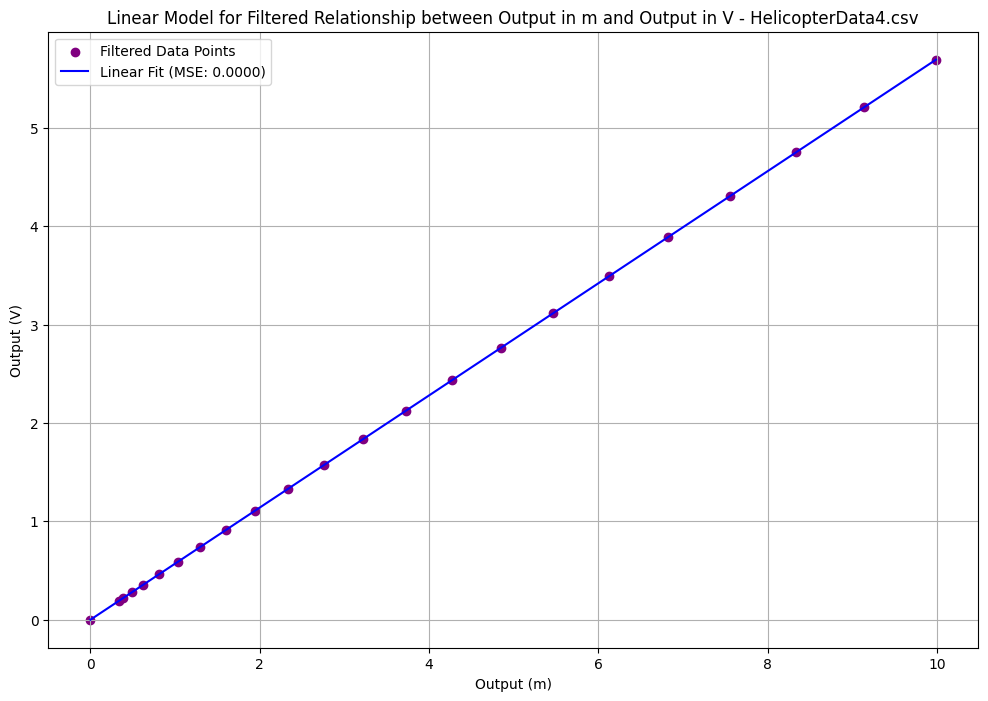

For file: HelicopterData4.csv
Pearson Correlation Coefficient: 0.9999999847985991
MSE for Linear Fit: 9.161162206227673e-08
Linear Equation for HelicopterData4.csv: y = 0.5699915412190348 * x + 1.2303280473080491e-05
---------------------------------------------------------------


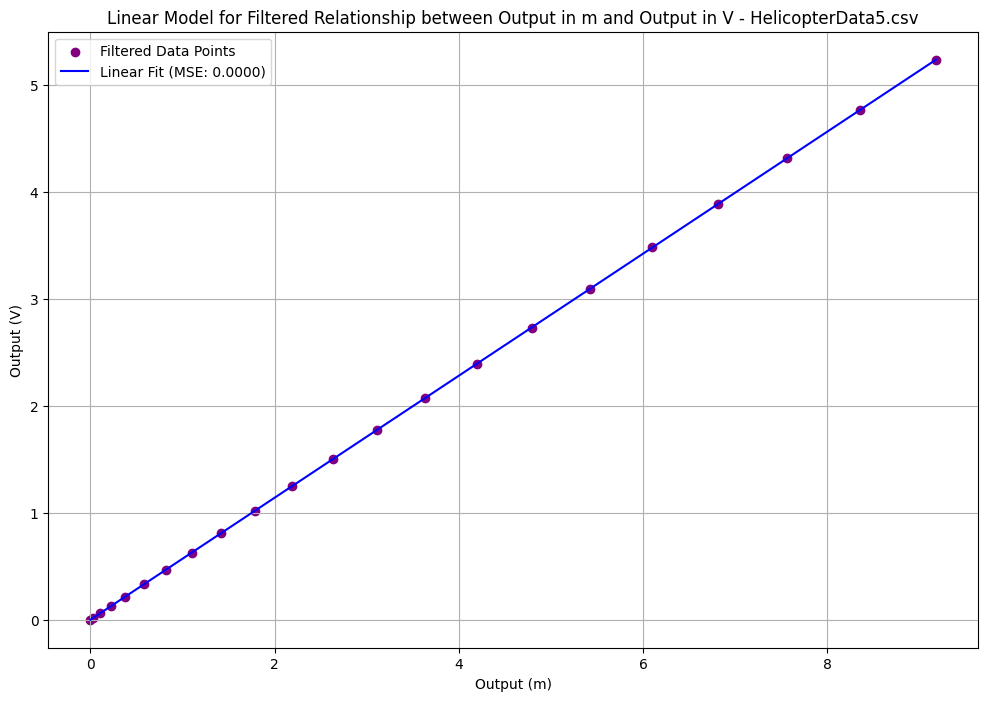

For file: HelicopterData5.csv
Pearson Correlation Coefficient: 0.9999999807004172
MSE for Linear Fit: 1.0357146458060089e-07
Linear Equation for HelicopterData5.csv: y = 0.5699920174992148 * x + 2.0552347854030373e-05
---------------------------------------------------------------
Averages:
Average H: 0.5699919402122069
---------------------------------------------------------------


In [7]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#iNTIALIZE VARIABLES
avg_H = 0

# List all CSV files in the 'KITTICOPTER' folder
csv_files = [f for f in os.listdir('KITTICOPTER') if f.endswith('.csv')]

# Loop through all CSV files
for file_name in csv_files:
    file_path = os.path.join('KITTICOPTER', file_name)
    
    # Read the CSV file
    df_new = pd.read_csv(file_path)

    # Filter data for Output(m) <= 10
    df_filtered = df_new[df_new['Output(m)'] <= 10]

    # Calculate Pearson correlation coefficient
    correlation_coefficient, _ = pearsonr(df_filtered['Output(m)'], df_filtered['Output(v)'])

    # Prepare data for the linear regression model
    X_filtered = df_filtered[['Output(m)']].values  # Convert to numpy array
    y_filtered = df_filtered['Output(v)'].values  # Convert to numpy array

    # Linear Regression
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_filtered, y_filtered)
    y_pred_linear_filtered = linear_regressor.predict(X_filtered)
    mse_linear_filtered = mean_squared_error(y_filtered, y_pred_linear_filtered)

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.scatter(X_filtered, y_filtered, color='purple', label='Filtered Data Points')
    plt.plot(X_filtered, y_pred_linear_filtered, color='blue', label=f'Linear Fit (MSE: {mse_linear_filtered:.4f})')
    plt.title(f'Linear Model for Filtered Relationship between Output in m and Output in V - {file_name}')
    plt.xlabel('Output (m)')
    plt.ylabel('Output (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Display correlation coefficient and MSE
    print(f"For file: {file_name}")
    print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
    print(f'MSE for Linear Fit: {mse_linear_filtered}')

    # Extract and display the equation for the linear model
    print(f'Linear Equation for {file_name}: y = {linear_regressor.coef_[0]} * x + {linear_regressor.intercept_}')
    print("---------------------------------------------------------------")


    #Add up all the values to get their averages
    avg_H += linear_regressor.coef_[0]

#Calculate the averages
avg_H /= len(csv_files)

#Print the averages
print("Averages:")
print(f"Average H: {avg_H}")
print("---------------------------------------------------------------")


Found 5 CSV files in folder.
Processing C:/Users/User/OneDrive - University of Cape Town/Desktop/EEE3094S/EEE3094S-2023/LAB2/withcontroller\HelicopterData13.946.csv


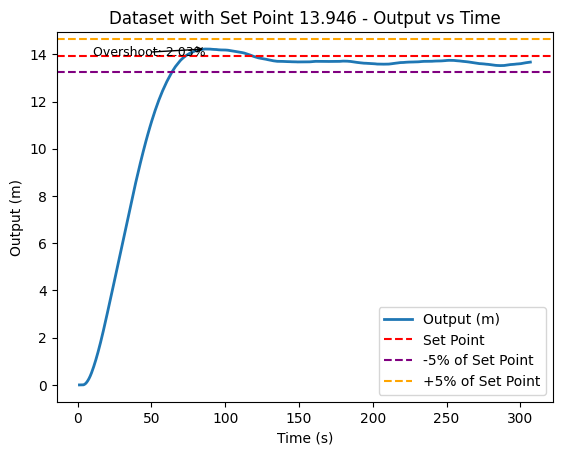

Processing C:/Users/User/OneDrive - University of Cape Town/Desktop/EEE3094S/EEE3094S-2023/LAB2/withcontroller\HelicopterData2.944.csv


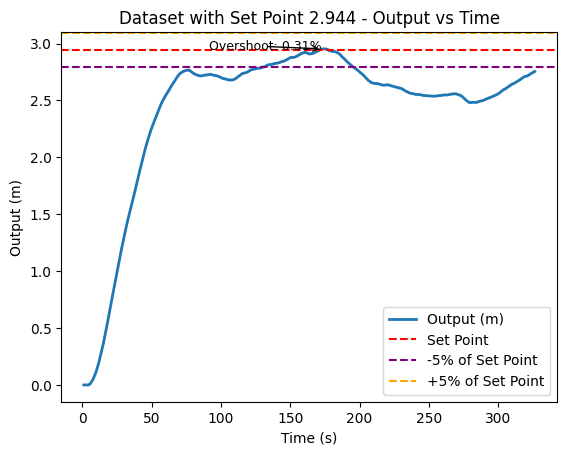

Processing C:/Users/User/OneDrive - University of Cape Town/Desktop/EEE3094S/EEE3094S-2023/LAB2/withcontroller\HelicopterData6.026.csv


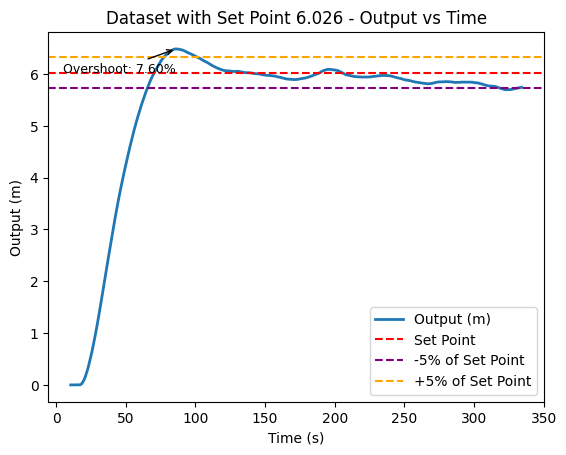

Processing C:/Users/User/OneDrive - University of Cape Town/Desktop/EEE3094S/EEE3094S-2023/LAB2/withcontroller\HelicopterData6.0260.csv


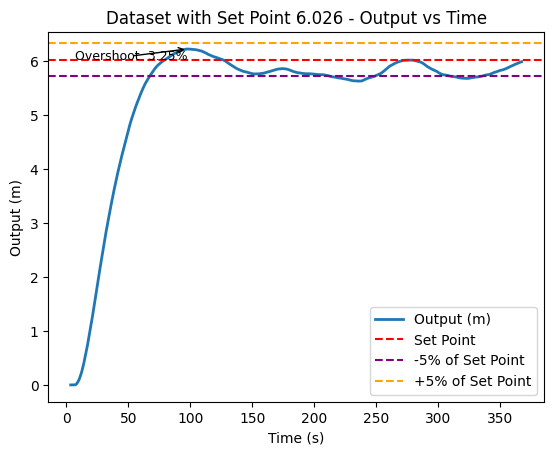

Processing C:/Users/User/OneDrive - University of Cape Town/Desktop/EEE3094S/EEE3094S-2023/LAB2/withcontroller\HelicopterData6.043.csv


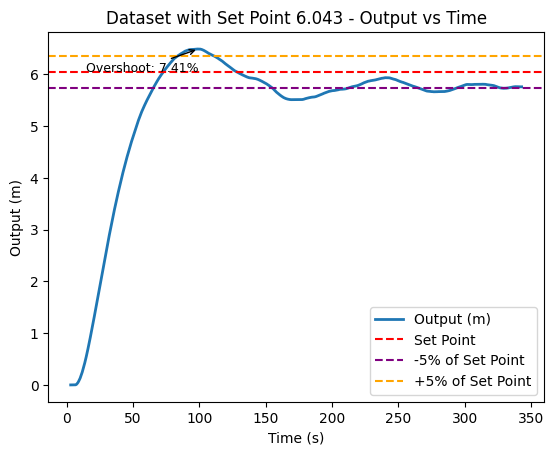

In [13]:
import glob
import matplotlib.pyplot as plt
import pandas as pd

def calculate_overshoot(max_output, set_point):
    return ((max_output - set_point) / set_point) * 100

def plot_dataset(file_path, set_point):
    dataset = pd.read_csv(file_path)
    max_output = dataset['Output(m)'].max()
    overshoot = calculate_overshoot(max_output, set_point)
    tolerance_5 = set_point * 0.05
    lower_bound_5 = set_point - tolerance_5
    upper_bound_5 = set_point + tolerance_5
    plt.plot(dataset['Time(s)'], dataset['Output(m)'], label='Output (m)', linewidth=2)
    plt.axhline(y=set_point, color='r', linestyle='--', label='Set Point')
    plt.axhline(y=lower_bound_5, color='purple', linestyle='--', label='-5% of Set Point')
    plt.axhline(y=upper_bound_5, color='orange', linestyle='--', label='+5% of Set Point')
    time_at_max_output = dataset['Time(s)'][dataset['Output(m)'] == max_output].iloc[0]
    plt.annotate(f'Overshoot: {overshoot:.2f}%', xy=(time_at_max_output, max_output), xytext=(time_at_max_output, set_point),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9, horizontalalignment='right')
    plt.title(f'Dataset with Set Point {set_point} - Output vs Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Output (m)')
    plt.legend()
    plt.show()

# Update this path to reflect the specific location of your 'withcontroller' folder
folder_path = 'C:/Users/User/OneDrive - University of Cape Town/Desktop/EEE3094S/EEE3094S-2023/LAB2/withcontroller/'

csv_files = glob.glob(f"{folder_path}HelicopterData*.csv")
print(f"Found {len(csv_files)} CSV files in folder.")  # Debugging line

if len(csv_files) == 0:
    print("No valid CSV files found. Please check the folder path and file names.")

for file_path in csv_files:
    print(f"Processing {file_path}")  # Debugging line
    set_point = float(file_path.split('HelicopterData')[1].split('.csv')[0])
    plot_dataset(file_path, set_point)
